## <span style="color:#0b486b">Part 3: Convolutional Neural Networks and Image Classification</span>

<div style="text-align: right"><span style="color:red">[Total marks for this part: 40 points]</span></div>

This part of the asssignment is designed to assess your knowledge and coding skill with Tensorflow as well as hands-on experience with training Convolutional Neural Network (CNN).

The dataset we use for this part is the [STL10 dataset](https://cs.stanford.edu/~acoates/stl10/) which consists of $5,000$ training images of airplane, bird, car, cat, deer, dog, horse, monkey, ship, truck; each of which has 500 images. You can download the dataset at [download here](https://drive.google.com/file/d/1bEwEx72lLrjY_Idj_FgV22atIdjtCV66/view?usp=sharing) and then decompress to the folder `datasets\Animals` in your assignment folder.**

Your task is to build a CNN model using *TF 2.x* to classify these animals. You're provided with the module <span style="color:red">models.py</span>, which you can find in the assignment folder, with some of the following classes:

1. `DatasetManager`: Support with loading and spliting the dataset into the train-val-test sets. It also supports generating next batches for training. 
2. `BaseImageClassifier`: A base class image classfication, which is basically a CNN model.

*Note*: You may need to install the package `imutils` if you have not installed yet

Firstly, we need to run the following cells to load required packages.

In [2]:
import os 
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from A1_S2_2023 import DatasetManager, BaseImageClassifier
import numpy as np

In [3]:
%load_ext autoreload
%autoreload 2

Note that the class `DatasetManager` has attributes related to *the training, validation, and testing sets*. You can use them in training your developped models in the sequel.

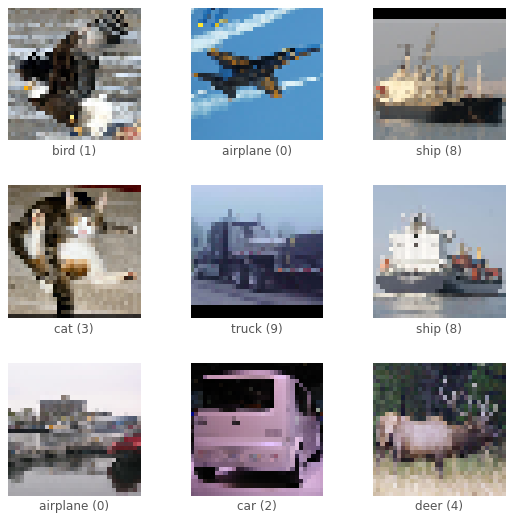

In [4]:
dataset_name = 'stl10'
# Choose path to store dataset
data_dir = 'C:/Users/user2/fit3181/assin1/tensorflow_datasets'.format(os.path.expanduser('~'))

data_manager = DatasetManager(dataset_name, data_dir)
data_manager.load_dataset() 
data_manager.preprocess_dataset()
data_manager.show_examples()

In [5]:
# Choose a random example
import random
num_examples = tf.data.experimental.cardinality(data_manager.ds_train).numpy()
random_index = random.randint(0, num_examples - 1)
example = next(iter(data_manager.ds_train.skip(random_index).take(1)))[0]

# Print the shape and value of the image
print("Image shape:", example.shape)
print("Image value range:", example.numpy().min(), "to", example.numpy().max())

Image shape: (32, 32, 3)
Image value range: 0.05490196 to 1.0


In [6]:
all_labels=[]
for image, label in data_manager.ds_train:
    all_labels.append(image.numpy())  # Assuming labels are stored as numpy arrays


In [7]:
# Check the number of examples in each dataset
print(tf.data.experimental.cardinality(data_manager.ds_train))
print(tf.data.experimental.cardinality(data_manager.ds_val))
print(tf.data.experimental.cardinality(data_manager.ds_test))

tf.Tensor(4500, shape=(), dtype=int64)
tf.Tensor(500, shape=(), dtype=int64)
tf.Tensor(8000, shape=(), dtype=int64)


We now use **BaseImageClassifier** built in the **A1_S2_2023.py** file which serves as a basic baseline to start the investigation. Follow the following steps to realize how to run a model and know the built-in methods associated with.

In [8]:
network1 = BaseImageClassifier(name='network1',
                       num_classes=10,
                       optimizer='sgd',
                       batch_size=128,
                       num_epochs=20,
                       learning_rate=0.001)

We first initialize a default model from the DefaultModel class. Basically, we can define the relevant parameters of training a model including `num_classes`, `optimizer`, `learning_rate`, `batch_size`, and `num_epochs`.

The method `build_cnn()` assists us in building your convolutional neural network. You can view the code (in the **A1_S2_2023.py** file) of the model behind a default model to realize how simple it is. Additionally, the method `summary()` shows the architecture of a model.

In [11]:
network1.build_cnn()
network1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 average_pooling2d (AverageP  (None, 16, 16, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 average_pooling2d_1 (Averag  (None, 8, 8, 64)         0         
 ePooling2D)                                          

In [12]:
x_train_batch = network1.optimize_data_pipeline(data_manager.ds_train, batch_size=32)
x_val_batch = network1.optimize_data_pipeline(data_manager.ds_val, batch_size=32)
network1.fit(x_train_batch, x_val_batch, num_epochs=20)

Epoch 1/20
141/141 [==============================] - 9s 55ms/step - loss: 2.2910 - accuracy: 0.1098 - val_loss: 2.2691 - val_accuracy: 0.1280
Epoch 2/20
141/141 [==============================] - 7s 52ms/step - loss: 2.2350 - accuracy: 0.1482 - val_loss: 2.1576 - val_accuracy: 0.2320
Epoch 3/20
141/141 [==============================] - 7s 52ms/step - loss: 2.1032 - accuracy: 0.2447 - val_loss: 2.0292 - val_accuracy: 0.2680
Epoch 4/20
141/141 [==============================] - 7s 51ms/step - loss: 1.9926 - accuracy: 0.2869 - val_loss: 1.9419 - val_accuracy: 0.3000
Epoch 5/20
141/141 [==============================] - 8s 54ms/step - loss: 1.9323 - accuracy: 0.3062 - val_loss: 1.8934 - val_accuracy: 0.3360
Epoch 6/20
141/141 [==============================] - 8s 55ms/step - loss: 1.8799 - accuracy: 0.3238 - val_loss: 1.8496 - val_accuracy: 0.3500
Epoch 7/20
141/141 [==============================] - 8s 57ms/step - loss: 1.8242 - accuracy: 0.3464 - val_loss: 1.8027 - val_accuracy: 0.3660

To train a model regarding to the datasets stored in `data_manager`, you can invoke the method `fit()` for which you can specify the batch size and number of epochs for your training. 

In [13]:
x_test_batch = network1.optimize_data_pipeline(data_manager.ds_test, batch_size=32)
network1.compute_accuracy(x_test_batch)

250/250 [==============================] - 7s 27ms/step - loss: 1.5501 - accuracy: 0.4410
loss: 1.5500835180282593
accuracy: 0.4410000145435333


Below shows how you can inspect the training progress.

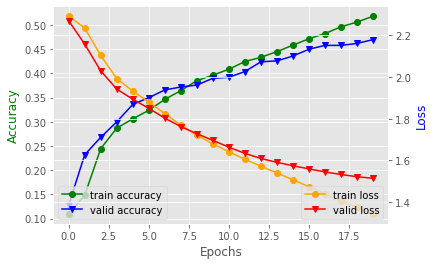

In [14]:
network1.plot_progress()

You can use the method `predict()` to predict labels for data examples in a test set.

In [15]:
num_samples = 25
sample_dataset = data_manager.ds_test.take(num_samples)
network1.predict(sample_dataset.batch(num_samples), data_manager.ds_info)

1/1 [==============================] - 0s 297ms/step
Sample 1: Predicted label - ship
Sample 2: Predicted label - monkey
Sample 3: Predicted label - cat
Sample 4: Predicted label - bird
Sample 5: Predicted label - ship
Sample 6: Predicted label - dog
Sample 7: Predicted label - deer
Sample 8: Predicted label - horse
Sample 9: Predicted label - airplane
Sample 10: Predicted label - deer
Sample 11: Predicted label - deer
Sample 12: Predicted label - truck
Sample 13: Predicted label - horse
Sample 14: Predicted label - truck
Sample 15: Predicted label - horse
Sample 16: Predicted label - cat
Sample 17: Predicted label - deer
Sample 18: Predicted label - airplane
Sample 19: Predicted label - truck
Sample 20: Predicted label - ship
Sample 21: Predicted label - dog
Sample 22: Predicted label - horse
Sample 23: Predicted label - car
Sample 24: Predicted label - truck
Sample 25: Predicted label - airplane


Finally, the method `plot_prediction()` visualizes the predictions for a test set in which several images are chosen to show the predictions.

1/1 [==============================] - 0s 109ms/step


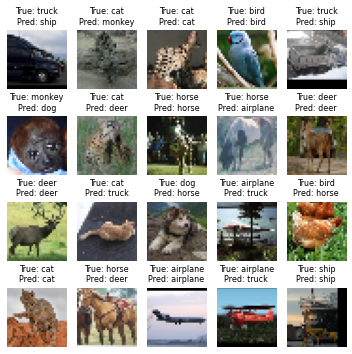

In [16]:
num_samples = 20
sample_dataset = data_manager.ds_test.take(num_samples)
network1.plot_predictions(sample_dataset, data_manager.ds_info, num_samples=num_samples, grid_shape=(4, 5))

### <span style="color:#0b486b">Question 3.1: Observe the learning curve</span> 
After running the above cells to train the default model and observe the learning curve. Report your observation (i.e. did the model learn well? if not, what is the problem? What would you do to improve it?). Write your answer below.

<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

*# WRITE YOUR ANSWER AND OBSERVATION HERE*

.....<br>
*Issue*
The model did not learn well, it is overfitted. From the graph we can see that valid loss is higher than train loss and train accuracy is higher than the valid accuracy, this suggest that the model is overfitting. The accuracy and loss also indicated this model doesn't perform well enough<br>
<br>
<br>
*How would i improve it?*
<br>
*data augmentation* by augmenting the data so that the model have more different data to learn from and feneralize better to unseen examples.
<br>
<br>
*hyperparameters tuning* by tuning the parameters like changing the number of epochs, learning rate and optimizer to see which combinations of hyperparameters might lead to the best accuracy.𝑢um_classes=10,
<br>
<br>
*Early stopping* where it is also a method to prevent overfitting by stopping the model to learn when the accuracy is not improving for a certain amount of time.



**For questions 3.2 to 3.9**, you'll need to write your own model in a way that makes it easy for you to experiment with different architectures and parameters. The goal is to be able to pass the parameters to initialize a new instance of `YourModel` to build different network architectures with different parameters. Below are descriptions of some parameters which you can find in function `__init__()` for the class `BaseImageClassifier`:

1. `num_blocks`: an integer specifying the number of blocks in our network. Each block has the pattern `[conv, batch norm, activation, conv, batch norm, activation, mean pool, dropout]`. All convolutional layers have filter size $(3, 3)$, strides $(1, 1)$ and 'SAME' padding, and all mean pool layers have strides $(2, 2)$ and 'SAME' padding. The network will consists of a few blocks before applying a linear layer to output the logits for the softmax layer.

2. `feature_maps`: the number of feature maps in the first block of the network. The number of feature_maps will double in each of the following block. To make it convenient for you, we already calculated the number of feature maps for each block for you in line $106$
3. `drop_rate`: the keep probability for dropout. Setting `drop_rate` to $0.0$ means not using dropout. 
4. `batch_norm`: the batch normalization function is used or not. Setting `batch_norm` to `None` means not using batch normalization. 
5. The `skip connection` is added to the output of the second `batch norm`. Additionally, your class has a boolean property (i.e., instance variable) named `use_skip`. If `use_skip=True`, the skip connectnion is enable. Otherwise, if `use_skip=False`, the skip connectnion is disable.

Below is the architecture of one block:

<img src="Figures/OneBlock.png" width="350" align="center"/>

Below is the architecture of the entire deep net with `two blocks`:

<img src="Figures/NetworkArchitecture.png" width="1200" align="center"/>

Here we assume that the first block has `feature_maps = feature_maps[0] = 32`. Note that the initial number of feature maps of the first block is declared in the instance variable `feature_maps` and is multiplied by $2$ in each follpwing block. 

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.layers import BatchNormalization

tf.random.set_seed(3181)

### <span style="color:#0b486b">Question 3.2: Define your CNN</span>

Write the code of the `YourModel` class here. Note that this class will be inherited from the `BaseImageClassifier` class. You'll only need to re-write the code for the `build_cnn` method in the `YourModel` class from the cell below.

<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

In [10]:
class YourModel(BaseImageClassifier):
    def __init__(self,
                 name='network1',
                 width=32, height=32, depth=3,
                 num_blocks=2, #num_residuals
                 feature_maps=32, #num_channels
                 num_classes=4,
                 drop_rate=0.2,
                 batch_norm=None,
                 is_augmentation=False,
                 activation_func='relu',
                 optimizer='adam',
                 use_skip=True,
                 batch_size=10,
                 num_epochs=20,
                 learning_rate=0.0001,
                 verbose=True):
        super(YourModel, self).__init__(name, width, height, depth, num_blocks, feature_maps, num_classes, drop_rate, batch_norm, is_augmentation, 
                                        activation_func, use_skip, optimizer, batch_size, num_epochs, learning_rate, verbose)
    
    def build_cnn(self):
        # INSERT YOUR CODE HERE
        
        # first input layer 
        inputs = layers.Input(shape=(self.height,self.width,self.depth))
       
        h = layers.Conv2D(self.feature_maps[0], (3,3), padding='same')(inputs)
        
        # code to build the block
        for i in range(self.num_blocks):
            
            # first convolution layer
            #because first block convolutional network had been added before the loop
            if i != 0:
                h = layers.Conv2D(self.feature_maps[i], (3,3), padding='same')(h)
            short_cut = h
            if self.batch_norm:
                h = layers.BatchNormalization()(h)
            
            h = layers.Activation(self.activation_func)(h)
            
            #add second convolutional layer
            h = layers.Conv2D(self.feature_maps[i], (3,3), padding='same')(h)
            
            if self.batch_norm:
                h = layers.BatchNormalization()(h)
            
            if self.use_skip:
                h = layers.Add()([h,short_cut])
                
            h = layers.Activation(self.activation_func)(h)
            h = layers.AveragePooling2D(pool_size=(2, 2), padding='same',strides = 2)(h)
            h = layers.Dropout(self.drop_rate)(h)
            
           

        h = layers.Flatten()(h)
        h = layers.Dense(self.num_classes, activation='softmax')(h)
        
        self.model = models.Model(inputs=inputs, outputs=h, name="YourModel")
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
myModel = YourModel(name='network1',width=32, height=32, depth=3,
                     feature_maps=32,
                     num_classes=data_manager.n_classes,
                     num_blocks=3,
                     drop_rate=0.0, 
                     batch_norm=True, 
                     use_skip=True,
                     optimizer='sgd',
                     learning_rate=0.001)

In [12]:
myModel.build_cnn()

In [13]:
myModel.summary()

Model: "YourModel"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 32, 32, 32)   896         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 32, 32, 32)  128         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 32, 32, 32)   0           ['batch_normalization[0][

### <span style="color:#0b486b">Question 3.3: Experiment with skip connection</span> 
Once writing your own model, you need to compare two cases: (i) *using the skip connection* and (ii) *not using the skip connection*. You should set the instance variable `use_skip` to either `True` or `False`. For your runs, report which case is better and if you confront overfitting in training.
    
<div style="text-align: right"> <span style="color:red">[6 points]</span> </div>

*# WRITE YOUR ANSWER AND OBSERVATION HERE*

.....




In [14]:
our_network_skip = YourModel(name='network1',
                     feature_maps=32,
                     num_classes=data_manager.n_classes,
                     num_blocks=3,
                     drop_rate=0.0, 
                     batch_norm=True, 
                     use_skip=True,
                     optimizer='sgd',
                     learning_rate=0.001)
our_network_skip.build_cnn()
our_network_skip.summary()

Model: "YourModel"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_6 (Conv2D)              (None, 32, 32, 32)   896         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_6 (BatchNo  (None, 32, 32, 32)  128         ['conv2d_6[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 activation_6 (Activation)      (None, 32, 32, 32)   0           ['batch_normalization_6[0

In [16]:
x_train_batch = our_network_skip.optimize_data_pipeline(data_manager.ds_train, batch_size=32)
x_val_batch = our_network_skip.optimize_data_pipeline(data_manager.ds_val, batch_size=32)

In [17]:
our_network_skip.fit(x_train_batch, x_val_batch, num_epochs=20)

Epoch 1/20
141/141 [==============================] - 8s 50ms/step - loss: 1.7591 - accuracy: 0.3569 - val_loss: 2.5876 - val_accuracy: 0.1140
Epoch 2/20
141/141 [==============================] - 7s 51ms/step - loss: 1.3393 - accuracy: 0.5109 - val_loss: 2.7885 - val_accuracy: 0.1480
Epoch 3/20
141/141 [==============================] - 7s 46ms/step - loss: 1.1543 - accuracy: 0.5884 - val_loss: 2.0267 - val_accuracy: 0.3160
Epoch 4/20
141/141 [==============================] - 7s 47ms/step - loss: 1.0174 - accuracy: 0.6431 - val_loss: 1.5966 - val_accuracy: 0.4160
Epoch 5/20
141/141 [==============================] - 6s 44ms/step - loss: 0.8987 - accuracy: 0.6980 - val_loss: 1.4661 - val_accuracy: 0.4840
Epoch 6/20
141/141 [==============================] - 6s 45ms/step - loss: 0.7952 - accuracy: 0.7427 - val_loss: 1.3267 - val_accuracy: 0.4960
Epoch 7/20
141/141 [==============================] - 7s 47ms/step - loss: 0.7004 - accuracy: 0.7887 - val_loss: 1.2882 - val_accuracy: 0.5220

In [18]:
our_network_no_skip = YourModel(name='network1',
                     feature_maps=32,
                     num_classes=data_manager.n_classes,
                     num_blocks=3,
                     drop_rate=0.0, 
                     batch_norm=True, 
                     use_skip=False,
                     optimizer='sgd',
                     learning_rate=0.001)
our_network_no_skip.build_cnn()
our_network_no_skip.summary()

Model: "YourModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_12 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 activation_12 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_13 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                        

In [19]:
x_train_batch = our_network_no_skip.optimize_data_pipeline(data_manager.ds_train, batch_size=32)
x_val_batch = our_network_no_skip.optimize_data_pipeline(data_manager.ds_val, batch_size=32)

In [20]:
our_network_no_skip.fit(x_train_batch, x_val_batch, num_epochs=20)


Epoch 1/20
141/141 [==============================] - 8s 51ms/step - loss: 1.7743 - accuracy: 0.3431 - val_loss: 2.5540 - val_accuracy: 0.1140
Epoch 2/20
141/141 [==============================] - 8s 55ms/step - loss: 1.3562 - accuracy: 0.5047 - val_loss: 2.5688 - val_accuracy: 0.1560
Epoch 3/20
141/141 [==============================] - 7s 47ms/step - loss: 1.1751 - accuracy: 0.5838 - val_loss: 1.8300 - val_accuracy: 0.3560
Epoch 4/20
141/141 [==============================] - 7s 51ms/step - loss: 1.0339 - accuracy: 0.6420 - val_loss: 1.5261 - val_accuracy: 0.4660
Epoch 5/20
141/141 [==============================] - 7s 52ms/step - loss: 0.9173 - accuracy: 0.6918 - val_loss: 1.4182 - val_accuracy: 0.4940
Epoch 6/20
141/141 [==============================] - 6s 45ms/step - loss: 0.8227 - accuracy: 0.7378 - val_loss: 1.3147 - val_accuracy: 0.5380
Epoch 7/20
141/141 [==============================] - 7s 50ms/step - loss: 0.7395 - accuracy: 0.7731 - val_loss: 1.2624 - val_accuracy: 0.5620

# Visualize the result 

### Perform Skip Connection

250/250 [==============================] - 9s 35ms/step - loss: 1.5437 - accuracy: 0.5487
loss: 1.5436931848526
accuracy: 0.5487499833106995


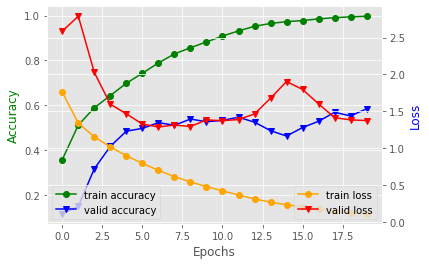

In [21]:
x_test_batch = our_network_skip.optimize_data_pipeline(data_manager.ds_test, batch_size=32)
our_network_skip.compute_accuracy(x_test_batch)
our_network_skip.plot_progress()

### Do not perform skip connection

250/250 [==============================] - 6s 22ms/step - loss: 1.4129 - accuracy: 0.5539
loss: 1.4129420518875122
accuracy: 0.5538750290870667


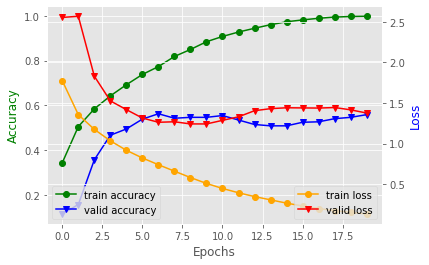

In [22]:
x_test_batch = our_network_no_skip.optimize_data_pipeline(data_manager.ds_test, batch_size=32)
our_network_no_skip.compute_accuracy(x_test_batch)
our_network_no_skip.plot_progress()

**observation**<br>
if we obsere the graphs both model do not perform well because they are overfitted where we can tell from valid accuracy is lower than train accuracy also train loss is lower than valid loss, so both models is overfitted. <br>
<br>
However, based on the accuracy and loss for the models, the model with skip connection perform slightly better with a accuracy of 0.53 and a loss of 1.70 while for the model without skip connection the accuracy is 0.47 and loss is 1.896

### <span style="color:#0b486b">Question 3.4: Tune hyperparameters with grid search</span>

Now, let us tune the $num\_blocks \in \{2,3,4\}$, $use\_skip \in \{True, False\}$, and $learning\_rate \in \{0.001, 0.0001\}$. Write your code for this tuning and report the result of the best model on the testing set. Note that you need to show your code for tuning and evaluating on the test set to earn the full marks. During tuning, you can set the instance variable `verbose` of your model to `False` for not showing the training details of each epoch.
 
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

*# REPORT THE BEST PARAMETERS AND THE TESTING ACCURACY HERE*

.....

In [122]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
# You can add more cells if necessary
#lst_opts = [tf.keras.optimizers.Adam(), tf.keras.optimizers.RMSprop(), tf.keras.optimizers.SGD(momentum=0.2)]
#lst_learning_rates = [0.1, 0.01, 0.001]

num_blocks = [2,3,4]
use_skip = [True,False]
learning_rate = [0.001,0.0001]

best_val_acc= - np.inf
best_history = None

for n in num_blocks:
    for b in use_skip:
        for l in learning_rate:
            
            our_model = YourModel(name='network1',
                                 feature_maps=32,
                                 num_classes=data_manager.n_classes,
                                 num_blocks=n,
                                 drop_rate=0.0, 
                                 batch_norm=True, 
                                 use_skip=b,
                                 optimizer='sgd',
                                 learning_rate=l)
            our_model.build_cnn()
            print("Number of blocks: {}, Use Skip: {}, Learning Rate = {}".format(n, b, l))
            history = our_model.fit(x_train_batch, x_val_batch, num_epochs=10)
            val_accuracy = max(our_model.history.history['val_accuracy'])

            if val_accuracy > best_val_acc:
                best_val_acc = val_accuracy
                best_model = our_model
                best_num = n
                best_use = b
                best_l = l
                best_history = history
                
                
                



Number of blocks: 2, Use Skip: True, Learning Rate = 0.001
Epoch 1/10
141/141 [==============================] - 26s 73ms/step - loss: 1.8415 - accuracy: 0.3384 - val_loss: 2.6452 - val_accuracy: 0.1420
Epoch 2/10
141/141 [==============================] - 8s 58ms/step - loss: 1.3908 - accuracy: 0.4993 - val_loss: 2.4946 - val_accuracy: 0.2320
Epoch 3/10
141/141 [==============================] - 8s 57ms/step - loss: 1.2001 - accuracy: 0.5771 - val_loss: 1.7886 - val_accuracy: 0.3860
Epoch 4/10
141/141 [==============================] - 7s 52ms/step - loss: 1.0683 - accuracy: 0.6313 - val_loss: 1.5538 - val_accuracy: 0.4400
Epoch 5/10
141/141 [==============================] - 8s 54ms/step - loss: 0.9588 - accuracy: 0.6787 - val_loss: 1.5760 - val_accuracy: 0.4540
Epoch 6/10
141/141 [==============================] - 6s 43ms/step - loss: 0.8669 - accuracy: 0.7167 - val_loss: 1.5570 - val_accuracy: 0.4420
Epoch 7/10
141/141 [==============================] - 7s 49ms/step - loss: 0.7854 

Epoch 6/10
141/141 [==============================] - 7s 49ms/step - loss: 1.4312 - accuracy: 0.4973 - val_loss: 1.5011 - val_accuracy: 0.4500
Epoch 7/10
141/141 [==============================] - 7s 52ms/step - loss: 1.3769 - accuracy: 0.5167 - val_loss: 1.4669 - val_accuracy: 0.4700
Epoch 8/10
141/141 [==============================] - 7s 49ms/step - loss: 1.3296 - accuracy: 0.5371 - val_loss: 1.4379 - val_accuracy: 0.4720
Epoch 9/10
141/141 [==============================] - 7s 51ms/step - loss: 1.2873 - accuracy: 0.5538 - val_loss: 1.4138 - val_accuracy: 0.4860
Epoch 10/10
141/141 [==============================] - 7s 49ms/step - loss: 1.2488 - accuracy: 0.5693 - val_loss: 1.3923 - val_accuracy: 0.4860
Number of blocks: 3, Use Skip: False, Learning Rate = 0.001
Epoch 1/10
141/141 [==============================] - 8s 53ms/step - loss: 1.7865 - accuracy: 0.3338 - val_loss: 2.7282 - val_accuracy: 0.1120
Epoch 2/10
141/141 [==============================] - 7s 49ms/step - loss: 1.3857

Number of blocks: 4, Use Skip: False, Learning Rate = 0.0001
Epoch 1/10
141/141 [==============================] - 12s 74ms/step - loss: 2.1147 - accuracy: 0.2369 - val_loss: 2.3358 - val_accuracy: 0.1060
Epoch 2/10
141/141 [==============================] - 10s 70ms/step - loss: 1.7628 - accuracy: 0.3691 - val_loss: 2.2732 - val_accuracy: 0.1380
Epoch 3/10
141/141 [==============================] - 10s 68ms/step - loss: 1.5968 - accuracy: 0.4267 - val_loss: 1.9216 - val_accuracy: 0.3180
Epoch 4/10
141/141 [==============================] - 10s 69ms/step - loss: 1.4857 - accuracy: 0.4778 - val_loss: 1.6224 - val_accuracy: 0.4080
Epoch 5/10
141/141 [==============================] - 10s 68ms/step - loss: 1.4011 - accuracy: 0.5138 - val_loss: 1.5233 - val_accuracy: 0.4420
Epoch 6/10
141/141 [==============================] - 9s 67ms/step - loss: 1.3322 - accuracy: 0.5409 - val_loss: 1.4808 - val_accuracy: 0.4480
Epoch 7/10
141/141 [==============================] - 10s 69ms/step - loss: 

In [124]:
best_val_acc, best_model, best_num, best_use, best_l, best_history

(0.492000013589859,
 4,
 False,
 0.0001,
 None)

250/250 [==============================] - 5s 18ms/step - loss: 1.5113 - accuracy: 0.4985
loss: 1.5112674236297607
accuracy: 0.4984999895095825


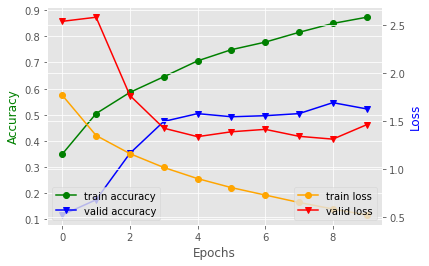

In [30]:
x_test_batch = best_model.optimize_data_pipeline(data_manager.ds_test, batch_size=32)
best_model.compute_accuracy(x_test_batch)
best_model.plot_progress()

#### Observation
<br>
Even after applying the best selected parameters to build the model, the model is still showing a trend of overfitting by having a higher valid loss than train loss and a higher train accuracy than valid accuracy

### <span style="color:#0b486b">Question 3.5: Apply data augmentation</span>

We now try to apply data augmentation to improve the performance. Extend the code of the class `YourModel` so that if the attribute `is_augmentation` is set to `True`, we apply the data augmentation. Also you need to incorporate early stopping to your training process. Specifically, you early stop the training if the valid accuracy cannot increase in three consecutive epochs.
   
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

Wtire your code in the cell below. Hint that you can rewrite the code of the `fit` method to apply the data augmentation. In addition, you can copy the code of `build_cnn` method above to reuse here.

#### Function to visualize the augmented data

In [24]:
import math
def visualize_data(images, categories, images_per_row = 8):
    class_names = ["airplane", 'bird', 'car', 'cat', 'deer', 'dog', 'horse', 'monkey', 'ship', 'truck']
    n_images = len(images)
    n_rows = math.ceil(float(n_images)/images_per_row)
    fig = plt.figure(figsize=(1.5*images_per_row, 1.5*n_rows))
    fig.patch.set_facecolor('white')
    for i in range(n_images):
        plt.subplot(n_rows, images_per_row, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(images[i])
        class_index = categories[i]
        plt.xlabel(class_names[class_index])
    plt.show()

In [25]:
class AugmentModel(BaseImageClassifier):
    def __init__(self,
                 name='network1',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=4, 
                 drop_rate=0.2,
                 batch_norm = None,
                 is_augmentation = False,
                 activation_func='relu',
                 use_skip = True,
                 optimizer='adam',
                 batch_size=10,
                 num_epochs= 20,
                 learning_rate=0.0001):
        super(AugmentModel, self).__init__(name, width, height, depth, num_blocks, feature_maps, num_classes, drop_rate, batch_norm, is_augmentation, 
                                        activation_func, use_skip, optimizer, batch_size, num_epochs, learning_rate)
    
    def build_cnn(self):
        # first input layer 
        inputs = layers.Input(shape=(self.height,self.width,self.depth))
       
        h = layers.Conv2D(self.feature_maps[0], (3,3), padding='same')(inputs)
        
        for i in range(self.num_blocks):
            
            # first convolution layer
            #because first block convolutional network had been added before the loop
            if i != 0:
                h = layers.Conv2D(self.feature_maps[i], (3,3), padding='same')(h)
            short_cut = h
            if self.batch_norm:
                h = layers.BatchNormalization()(h)
            
            h = layers.Activation(self.activation_func)(h)
            
            #add second convolutional layer
            h = layers.Conv2D(self.feature_maps[i], (3,3), padding='same')(h)
            
            if self.batch_norm:
                h = layers.BatchNormalization()(h)
            
            if self.use_skip:
                h = layers.Add()([h,short_cut])
                
            h = layers.Activation(self.activation_func)(h)
            h = layers.AveragePooling2D(pool_size=(2, 2), padding='same',strides = 2)(h)
            h = layers.Dropout(self.drop_rate)(h)
            
           

        h = layers.Flatten()(h)
        h = layers.Dense(self.num_classes, activation='softmax')(h)
        
        self.model = models.Model(inputs=inputs, outputs=h, name="YourModel2")
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        
        
    
    def fit(self, data_manager, batch_size=None, num_epochs=None, callbacks=None):
        # INSERT YOUR CODE HERE
        batch_size = self.batch_size if num_epochs is None else batch_size
        num_epochs = self.num_epochs if num_epochs is None else num_epochs
        
        ds_train = data_manager.ds_train
        
        # to perform data augmentation
        if self.is_augmentation:
            labels=[]
            images = []
            
            # retreive the image from data manager
            for image, label in data_manager.ds_train:
                labels.append(label.numpy())  # Assuming labels are stored as numpy arrays
                images.append(image.numpy())

            print(len(labels),len(images))
            print(type(labels),type(images))

            # convert them to numpy array
            images = np.array(images)
            labels = np.array(labels)
            
            # Augment the data
            data_aug = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, width_shift_range=0.1, height_shift_range=0.1)
            data_aug.fit(images)
            
            # differentiate augmented image into image and labels
            ds_train = data_aug.flow(images,labels, batch_size=batch_size)
            batch_images, batch_labels = next(ds_train)
            
            # uncomment to visualize the augmented data
            #visualize_data(batch_images, batch_labels)
        
        x_train_batch_aug = self.optimize_data_pipeline(data_manager.ds_train, batch_size=batch_size)
        x_val_batch_aug = self.optimize_data_pipeline(data_manager.ds_val, batch_size=batch_size)
        
        
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        self.history = self.model.fit(ds_train , epochs=num_epochs, validation_data=x_val_batch_aug, callbacks=callbacks, verbose=self.verbose)

### Evaluate performance  <br>
- from question3.4 best number of block is 3, skip = False, learning rate 0.001 will give us the highest validation accuracy

In [26]:
# build the model
augment_model = AugmentModel(name='network5',
                     feature_maps=32,
                     num_classes=data_manager.n_classes,
                     num_blocks=4,
                     drop_rate=0.0, 
                     batch_norm=True, 
                    is_augmentation= True,
                     use_skip=False,
                     optimizer='sgd',
                     learning_rate=0.0001)

augment_model.build_cnn()
augment_model.summary()

Model: "YourModel2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_18 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 activation_18 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_19 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                       

## <span style="color:#0b486b">Question 3.6: Observe model performance with data augmentation</span>

Leverage your best model with the data augmentation and try to observe the difference in performance between using data augmentation and not using it.
   
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

*WRITE YOUR ANSWER AND OBSERVATION HERE* <br>

Based on the observation, the model with data augmentation are performing better than the one without data augmentation based on the accuracy and loss. However, the model with data augmentation and is not performing very good because it is overfitted where we can tell from the graph the  the train loss and valid loss, train accuracy and valid accuracy in the model with data augmentation are very far apart. Therefore it is not performing very well as well.
<br>
<br>
However, the model with data augmentation and early stopping are not performing very well as well because the early stopping stopped at 6 epochs which resulted the model do not have enough data on training, hence the model perform very bad and this also showed that early stopping does not always work and resulted the model without early stopping accuracy and loss performing slightly better.
<br>

.....

#### with augmentation and early stopping

In [140]:
early_checkpoint = EarlyStopping(patience=3, monitor='val_accuracy', mode='max')
callbacks = [early_checkpoint]
augment_model.fit(data_manager,batch_size=32, num_epochs=20, callbacks=callbacks)

4500 4500
<class 'list'> <class 'list'>
Epoch 1/20
141/141 [==============================] - 12s 76ms/step - loss: 1.0458 - accuracy: 0.6251 - val_loss: 1.2166 - val_accuracy: 0.5660
Epoch 2/20
141/141 [==============================] - 10s 73ms/step - loss: 1.0285 - accuracy: 0.6278 - val_loss: 1.1912 - val_accuracy: 0.5640
Epoch 3/20
141/141 [==============================] - 11s 80ms/step - loss: 1.0324 - accuracy: 0.6264 - val_loss: 1.1810 - val_accuracy: 0.5980
Epoch 4/20
141/141 [==============================] - 10s 74ms/step - loss: 1.0230 - accuracy: 0.6276 - val_loss: 1.1702 - val_accuracy: 0.5780
Epoch 5/20
141/141 [==============================] - 10s 73ms/step - loss: 1.0157 - accuracy: 0.6382 - val_loss: 1.1520 - val_accuracy: 0.5980
Epoch 6/20
141/141 [==============================] - 13s 90ms/step - loss: 1.0128 - accuracy: 0.6338 - val_loss: 1.1607 - val_accuracy: 0.5880


250/250 [==============================] - 7s 26ms/step - loss: 1.2294 - accuracy: 0.5526
loss: 1.2293938398361206
accuracy: 0.5526250004768372


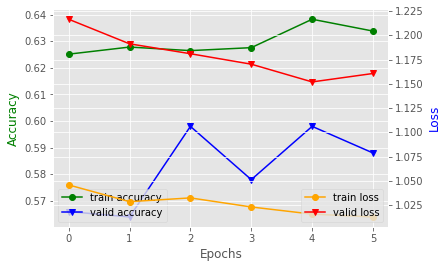

In [142]:
x_test_batch = augment_model.optimize_data_pipeline(data_manager.ds_test, batch_size=32)
augment_model.compute_accuracy(x_test_batch)
augment_model.plot_progress()

#### With augmentation but without early stopping

In [146]:
augment_model.fit(data_manager,batch_size=32, num_epochs=15)

4500 4500
<class 'list'> <class 'list'>
Epoch 1/15
141/141 [==============================] - 11s 71ms/step - loss: 0.9182 - accuracy: 0.6709 - val_loss: 1.1457 - val_accuracy: 0.6020
Epoch 2/15
141/141 [==============================] - 11s 78ms/step - loss: 0.9361 - accuracy: 0.6629 - val_loss: 1.2489 - val_accuracy: 0.5640
Epoch 3/15
141/141 [==============================] - 10s 72ms/step - loss: 0.9308 - accuracy: 0.6691 - val_loss: 1.1919 - val_accuracy: 0.5500
Epoch 4/15
141/141 [==============================] - 10s 70ms/step - loss: 0.9170 - accuracy: 0.6718 - val_loss: 1.1511 - val_accuracy: 0.5760
Epoch 5/15
141/141 [==============================] - 10s 71ms/step - loss: 0.9095 - accuracy: 0.6782 - val_loss: 1.1617 - val_accuracy: 0.5780
Epoch 6/15
141/141 [==============================] - 10s 70ms/step - loss: 0.8945 - accuracy: 0.6733 - val_loss: 1.1608 - val_accuracy: 0.5680
Epoch 7/15
141/141 [==============================] - 10s 72ms/step - loss: 0.8957 - accuracy: 0

250/250 [==============================] - 7s 28ms/step - loss: 1.2589 - accuracy: 0.5494
loss: 1.2588958740234375
accuracy: 0.5493749976158142


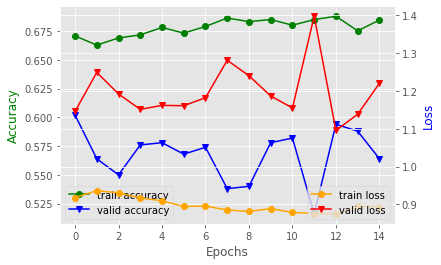

In [147]:
x_test_batch = augment_model.optimize_data_pipeline(data_manager.ds_test, batch_size=32)
augment_model.compute_accuracy(x_test_batch)
augment_model.plot_progress()

#### Without augmentation

250/250 [==============================] - 7s 28ms/step - loss: 1.5113 - accuracy: 0.4985
loss: 1.5112674236297607
accuracy: 0.4984999895095825


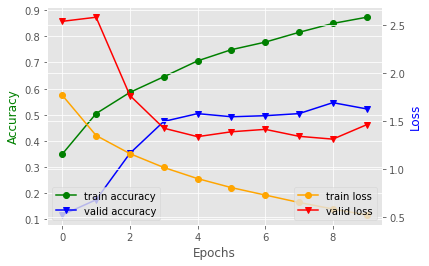

In [230]:
x_test_batch = best_model.optimize_data_pipeline(data_manager.ds_test, batch_size=32)
best_model.compute_accuracy(x_test_batch)
best_model.plot_progress()

### <span style="color:#0b486b">Question 3.7: Explore data mixup technique</span>

<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

Data mixup is another super-simple technique used to boost the generalization ability of deep learning models. You need to incoroporate data mixup technique to the above deep learning model and experiment its performance. There are some papers and documents for data mixup as follows:
- Main paper for data mixup [link for main paper](https://openreview.net/pdf?id=r1Ddp1-Rb) and a good article [article link](https://www.inference.vc/mixup-data-dependent-data-augmentation/).

You need to extend your model developed above, train a model using data mixup, and write your observations and comments about the result.

*# WRITE YOUR ANSWER AND OBSERVATION HERE*

.....


In [237]:
class MixModel(BaseImageClassifier):
    def __init__(self,
                 name='network1',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=4, 
                 drop_rate=0.2,
                 batch_norm = None,
                 is_augmentation = False,
                 activation_func='relu',
                 use_skip = True,
                 optimizer='adam',
                 batch_size=10,
                 num_epochs= 20,
                 learning_rate=0.0001):
        super(MixModel, self).__init__(name, width, height, depth, num_blocks, feature_maps, num_classes, drop_rate, batch_norm, is_augmentation, 
                                        activation_func, use_skip, optimizer, batch_size, num_epochs, learning_rate)
    
    def build_cnn(self):
        # first input layer 
        inputs = layers.Input(shape=(self.height,self.width,self.depth))
       
        h = layers.Conv2D(self.feature_maps[0], (3,3), padding='same')(inputs)
        
        for i in range(self.num_blocks):
            
            # first convolution layer
            #because first block convolutional network had been added before the loop
            if i != 0:
                h = layers.Conv2D(self.feature_maps[i], (3,3), padding='same')(h)
            short_cut = h
            if self.batch_norm:
                h = layers.BatchNormalization()(h)
            
            h = layers.Activation(self.activation_func)(h)
            
            #add second convolutional layer
            h = layers.Conv2D(self.feature_maps[i], (3,3), padding='same')(h)
            
            if self.batch_norm:
                h = layers.BatchNormalization()(h)
            
            if self.use_skip:
                h = h+short_cut
                
            h = layers.Activation(self.activation_func)(h)
            h = layers.AveragePooling2D(pool_size=(2, 2), padding='same',strides = 2)(h)
            h = layers.Dropout(self.drop_rate)(h)
            
           

        h = layers.Flatten()(h)
        h = layers.Dense(self.num_classes, activation='softmax')(h)
        
        self.model = models.Model(inputs=inputs, outputs=h, name="MixModel")
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    def fit_mix(self, data_manager, batch_size=None, num_epochs=None, callbacks=None, alpha = 0.1):
        # INSERT YOUR CODE HERE
        batch_size = self.batch_size if num_epochs is None else batch_size
        num_epochs = self.num_epochs if num_epochs is None else num_epochs
        
        ds_train = data_manager.ds_train
        
        # data augmentation
        labels=[] # y
        images = [] # x
        for image, label in data_manager.ds_train:
            labels.append(label.numpy())  # y
            images.append(image.numpy()) # x

        print(len(labels),len(images))
        print(type(labels),type(images))

        # convert them to numpy array
        images = np.array(images)
        labels = np.array(labels)

        mix_images = []
        mix_labels = []

        # randomly select index for x'
        index = tf.random.shuffle(tf.range(len(labels)))
         
        # loop thorugh all images
        for i in range(len(labels)):
            
            #define lambda value
            lam = np.random.beta(alpha+1, alpha, batch_size)
            lam = tf.reshape(lam, (batch_size, 1, 1))
            
            # mixed the image randomly
            mixed_x = lam * images[i] + (1 - lam) * images[index[i]]
            y=labels[i]

            mix_images.append(mixed_x)
            mix_labels.append(y)
        
        # because i append them into list, now convert back to numpy object
        mix_images=np.array(mix_images)
        mix_labels=np.array(mix_labels)
        
        # combine both images and labels data into one data
        mix_dataset = tf.data.Dataset.from_tensor_slices((mix_images, mix_labels))
        
        x_train_batch_mix = self.optimize_data_pipeline(mix_dataset, batch_size=batch_size)
        x_val_batch_mix = self.optimize_data_pipeline(data_manager.ds_val, batch_size=batch_size)
        
        # train the model
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        self.history = self.model.fit(x_train_batch_mix , epochs=num_epochs, validation_data=x_val_batch_mix, callbacks=callbacks, verbose=self.verbose)

In [238]:
# build the model
mix_model = MixModel(name='network5',
                     feature_maps=32,
                     num_classes=data_manager.n_classes,
                     num_blocks=4,
                     drop_rate=0.0, 
                     batch_norm=True, 
                    is_augmentation= True,
                     use_skip=False,
                     optimizer='sgd',
                     learning_rate=0.0001)
mix_model.build_cnn()
mix_model.summary()

Model: "MixModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_46 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_320 (Conv2D)         (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_316 (Ba  (None, 32, 32, 32)       128       
 tchNormalization)                                               
                                                                 
 activation_315 (Activation)  (None, 32, 32, 32)       0         
                                                                 
 conv2d_321 (Conv2D)         (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_317 (Ba  (None, 32, 32, 32)       128       
 tchNormalization)                                        

In [240]:
early_checkpoint = EarlyStopping(patience=3, monitor='val_accuracy', mode='max')
callbacks = [early_checkpoint]
mix_model.fit_mix(data_manager,batch_size=32, num_epochs=20, callbacks=callbacks,alpha=0.2)

4500 4500
<class 'list'> <class 'list'>
Epoch 1/20
141/141 [==============================] - 10s 63ms/step - loss: 1.6893 - accuracy: 0.3842 - val_loss: 1.9350 - val_accuracy: 0.3020
Epoch 2/20
141/141 [==============================] - 9s 63ms/step - loss: 1.5877 - accuracy: 0.4220 - val_loss: 1.6518 - val_accuracy: 0.3800
Epoch 3/20
141/141 [==============================] - 9s 65ms/step - loss: 1.5112 - accuracy: 0.4602 - val_loss: 1.5652 - val_accuracy: 0.4100
Epoch 4/20
141/141 [==============================] - 9s 64ms/step - loss: 1.4490 - accuracy: 0.4900 - val_loss: 1.5313 - val_accuracy: 0.4280
Epoch 5/20
141/141 [==============================] - 9s 64ms/step - loss: 1.3946 - accuracy: 0.5120 - val_loss: 1.5077 - val_accuracy: 0.4480
Epoch 6/20
141/141 [==============================] - 9s 65ms/step - loss: 1.3453 - accuracy: 0.5378 - val_loss: 1.4892 - val_accuracy: 0.4660
Epoch 7/20
141/141 [==============================] - 9s 66ms/step - loss: 1.2994 - accuracy: 0.5607 

#### With data mix up and Early Stopping

250/250 [==============================] - 6s 25ms/step - loss: 1.3478 - accuracy: 0.4999
loss: 1.3478434085845947
accuracy: 0.499875009059906


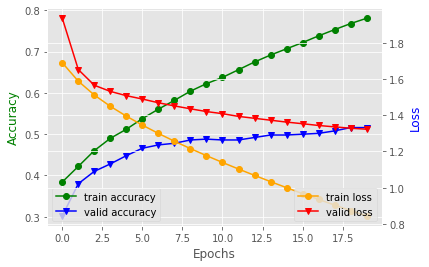

In [241]:
x_test_batch = mix_model.optimize_data_pipeline(data_manager.ds_test, batch_size=32)
mix_model.compute_accuracy(x_test_batch)
mix_model.plot_progress()

#### With Augmention and Early Stopping

250/250 [==============================] - 6s 25ms/step - loss: 1.5622 - accuracy: 0.4191
loss: 1.5621700286865234
accuracy: 0.4191249907016754


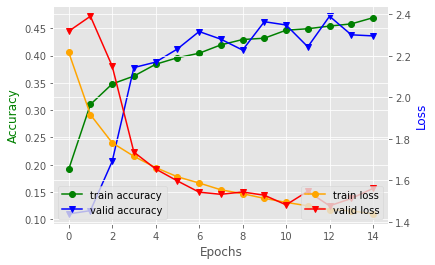

In [49]:
x_test_batch = augment_model.optimize_data_pipeline(data_manager.ds_test, batch_size=32)
augment_model.compute_accuracy(x_test_batch)
augment_model.plot_progress()

**Obervation** <br>
From previous question i found that the model with augmentation and early stopping are the best, because the model is generalised enough based on the graph. Hence I will use that model to compare with this model with mix up and early stopping.
<br>
<br>
Based on obeservation, Although this model with mix up data has the highest accuracy and lowest loss across the model with best parameters selected and the model with augmented data but this model with mix up data is not generalised enough, it is not performing better than the model with data augmentation because this model is overfitted where we can obeserve from the chart where the valid accuracy is lower than train accuracy and train loss is lower than valid loss. Furthermore, the model accuracy is not

### <span style="color:#0b486b">Question 3.8: Attack your model</span>

Attack your best obtained model with PGD, MIM, and FGSM attacks with $\epsilon= 0.0313, k=20, \eta= 0.002$ on the testing set. Write the code for the attacks and report the robust accuracies. Also choose a random set of 20 clean images in the testing set and visualize the original and attacked images.
   
<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

#### Define the best model i found above for adversarial usage <br>
<br>
The best model i found above is the model with augmented data (augment_model) based on accuracy and loss as all my previously found model are overfitted.

#### function to print image

In [46]:
def plot_image_grid(num_image,img_ori, image, label, image_shape):
        #fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
        for i in range(num_image):
            fig = plt.figure(figsize=(10, 10*3))
            for j in range(2):
                shown_img = img_ori[i] if j==0 else image[i]
                shown_label = 'Original image: {}'.format(label[i]) if j==0 else 'Adversarial image: {}'.format(label[i])
                plt.subplot(1,3,j+1)
                plt.imshow(shown_img)
                plt.xlabel(shown_label, fontsize= 12)
                plt.xticks([])
                plt.yticks([])
                plt.grid(False)

        
        
        
       


#### process the data

In [29]:
# testing data set
ds_test = data_manager.ds_test
        
test_labels_attack =[]
test_images_attack = []
for image, label in data_manager.ds_test:
    test_labels_attack.append(label.numpy())  # Assuming labels are stored as numpy arrays
    test_images_attack.append(image.numpy())

#print(len(labels),len(images))
#print(type(labels),type(images))

# convert them to numpy array
test_images_attack = np.array(test_images_attack)
test_labels_attack = np.array(test_labels_attack)


#### Attack model function

#### PGD <br>
(code taken from tutorial)

In [30]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
# You can add more cells if necessary
def pgd_attack(model, input_image, input_label= None, 
              epsilon=0.3, 
              num_steps=20, 
              step_size=0.01, 
              clip_value_min=0., 
              clip_value_max=1.0, 
              soft_label=False,
              from_logits= False): 
    """
    Args: 
        model: pretrained model 
        input_image: original (clean) input image (tensor)
        input_label: original label (tensor, categorical representation)
        epsilon: perturbation boundary 
        num_steps: number of attack steps 
        step_size: size of each move in each attack step 
        clip_value_min, clip_value_max: range of valid input 
        from_logits = True: attack from logits otherwise attack from prediction probabilites
    Note: 
        we expect the output of model should be logits vector  
    """       
    
    loss_fn = tf.keras.losses.sparse_categorical_crossentropy  #compute CE loss from logits or prediction probabilities
    
    if type(input_image) is np.ndarray: 
        input_image = tf.convert_to_tensor(input_image)
    
    if type(input_label) is np.ndarray: 
        input_label = tf.convert_to_tensor(input_label)
        
    # random initialization around input_image 
    random_noise = tf.random.uniform(shape=input_image.shape, minval=-epsilon, maxval=epsilon)
    adv_image = input_image + random_noise

    for _ in range(num_steps): 
        with tf.GradientTape(watch_accessed_variables=False) as tape: 
            tape.watch(adv_image)
            adv_output = model(adv_image)
            if not soft_label:
                loss = loss_fn(input_label, adv_output, from_logits= from_logits) # use ground-truth label to attack
            else: 
                pred_label = tf.math.argmax(adv_output, axis=1)
                loss = loss_fn(pred_label, adv_output, from_logits= from_logits) # use predicted label to attack

        gradient = tape.gradient(loss, adv_image) # get the gradient of the loss w.r.t. the current point 
        adv_image = adv_image + step_size * tf.sign(gradient) # move current adverarial example along the gradient direction with step size is eta 
        adv_image = tf.clip_by_value(adv_image, input_image-epsilon, input_image+epsilon) # clip to a valid boundary  
        adv_image = tf.clip_by_value(adv_image, clip_value_min, clip_value_max)  # clip to a valid range
        adv_image = tf.stop_gradient(adv_image) # stop the gradient to make the adversarial image as a constant input 
    return adv_image

#### MIM <br>
(code taken from tutorial)

In [32]:
def mim_attack(model, input_image, input_label= None, 
              epsilon=0.3, 
              gamma= 0.9,
              num_steps=20, 
              step_size=0.01, 
              clip_value_min=0., 
              clip_value_max=1.0, 
              soft_label=False,
              from_logits= False): 
    """
    Args: 
        model: pretrained model 
        input_image: original (clean) input image (tensor)
        input_label: original label (tensor, categorical representation)
        epsilon: perturbation boundary 
        gamma: momentum decay
        num_steps: number of attack steps 
        step_size: size of each move in each attack step 
        clip_value_min, clip_value_max: range of valid input 
        from_logits = True: attack from logits otherwise attack from prediction probabilites
    Note: 
        we expect the output of model should be logits vector  
    """       
   
    loss_fn = tf.keras.losses.sparse_categorical_crossentropy # compute CE loss from logits or prediction probabilities
    
    if type(input_image) is np.ndarray: 
        input_image = tf.convert_to_tensor(input_image)
    
    if type(input_label) is np.ndarray: 
        input_label = tf.convert_to_tensor(input_label)
        
    # random initialization around input_image 
    random_noise = tf.random.uniform(shape=input_image.shape, minval=-epsilon, maxval=epsilon)
    adv_image = input_image + random_noise
    adv_noise = random_noise

    for _ in range(num_steps): 
        with tf.GradientTape(watch_accessed_variables=False) as tape: 
            tape.watch(adv_image)
            adv_output = model(adv_image)
            if not soft_label:
                loss = loss_fn(input_label, adv_output, from_logits=from_logits) # use ground-truth label to attack
            else: 
                pred_label = tf.math.argmax(adv_output, axis=1)
                loss = loss_fn(pred_label, adv_output, from_logits=from_logits) # use predicted label to attack

        gradient = tape.gradient(loss, adv_image) # get the gradient of the loss w.r.t. the current point 
        adv_image_new = adv_image + step_size * tf.sign(gradient) # move current adverarial example along the gradient direction with step size is eta 
        adv_image_new = tf.clip_by_value(adv_image_new, input_image-epsilon, input_image+epsilon) # clip to a valid boundary  
        adv_image_new = tf.clip_by_value(adv_image_new, clip_value_min, clip_value_max) # clip to a valid range
        adv_noise = gamma*adv_noise + (1-gamma)*(adv_image_new - adv_image)
        adv_image = adv_image_new
        adv_image = tf.stop_gradient(adv_image) # stop the gradient to make the adversarial image as a constant input 
    adv_image = adv_image + adv_noise
    adv_image = tf.clip_by_value(adv_image, input_image-epsilon, input_image+epsilon) # clip to a valid boundary  
    adv_image = tf.clip_by_value(adv_image, clip_value_min, clip_value_max) # clip to a valid range
    return adv_image

#### FGSM <br>
(code taken from tutorial)

In [33]:
def fgsm_attack(model, input_image, input_label=None, 
               epsilon=0.3, 
               clip_value_min=0., 
               clip_value_max=1.0, 
               soft_label=False,
               from_logits=False): 
    """
    Args: 
        model: pretrained model 
        input_image: original (clean) input image (tensor)
        input_label: original label (tensor, categorical representation)
        epsilon: perturbation boundary 
        clip_value_min, clip_value_max: range of valid input 
        from_logits = True: attack from logits otherwise attack from prediction probabilites
    Note: 
        we expect the output of model should be logits vector 
    """
    
    loss_fn = tf.keras.losses.sparse_categorical_crossentropy # compute CE loss from logits or prediction probabilities
    
    if type(input_image) is np.ndarray: 
        input_image = tf.convert_to_tensor(input_image)
    
    if type(input_label) is np.ndarray: 
        input_label = tf.convert_to_tensor(input_label)
        
    with tf.GradientTape() as tape: 
        tape.watch(input_image)
        output = model(input_image)
        if not soft_label:
            loss = loss_fn(input_label, output, from_logits=from_logits) # use ground-truth label to attack
        else: 
            pred_label = tf.math.argmax(output, axis=1) # use predicted label to attack
            loss = loss_fn(pred_label, output, from_logits=from_logits)

    gradient = tape.gradient(loss, input_image) # get the gradients of the loss w.r.t. the input image 
    adv_image = input_image + epsilon * tf.sign(gradient) # get the final adversarial examples, epsilon very small value on ori img
    adv_image = tf.clip_by_value(adv_image, clip_value_min, clip_value_max) # clip to a valid range  
    adv_image = tf.stop_gradient(adv_image) # stop the gradient to make the adversarial image as a constant input
    return adv_image

### Attack

#### PGD

In [34]:
from sklearn.metrics import accuracy_score

def attack_pgd(ad_attack, model_attack):
    
    epsilon=0.0313 
    num_steps=20  
    step_size= 0.002
    
    y_adv = []
    y_true = []
    attack_dataset = tf.data.Dataset.from_tensor_slices((test_images_attack, test_labels_attack))
    attack_batch = model_attack.optimize_data_pipeline(attack_dataset, batch_size=32)
    
    model_attack = model_attack.model
    for X_batch, y_batch in attack_batch:
        #print(X_batch, y_batch)
        X_batch_adv = ad_attack(model_attack, X_batch, y_batch, epsilon=0.0313, num_steps=20,  step_size= 0.002)
        y_batch_adv = np.argmax(model_attack(X_batch_adv).numpy(), 1)
    
        y_adv.append(y_batch_adv[0].tolist())
        y_true.append(y_batch.numpy()[0].tolist())
 
    test_adv_acc = accuracy_score(y_true, y_adv)
    return "Robust of "+str(ad_attack)+" Test adv accuracy:{}".format(test_adv_acc)

In [118]:
attack_pgd(pgd_attack, augment_model)

'Robust of <function pgd_attack at 0x000002BD5DBC8160> Test adv accuracy:0.08'

Robust accuracy for PGD attack is 0.08

#### MIM

In [35]:
def attack_mim(ad_attack, model_attack):
    
    epsilon=0.0313 
    num_steps=20  
    step_size= 0.002
    
    y_adv = []
    y_true = []
    attack_dataset = tf.data.Dataset.from_tensor_slices((test_images_attack, test_labels_attack))
    attack_batch = model_attack.optimize_data_pipeline(attack_dataset, batch_size=32)
    
    model_attack = model_attack.model
    for X_batch, y_batch in attack_batch:
        #print(X_batch, y_batch)
                
        X_batch_adv = ad_attack(model_attack, X_batch, y_batch, epsilon=0.0313 , num_steps = 20, step_size = 0.002)
        y_batch_adv = np.argmax(model_attack(X_batch_adv).numpy(), 1)
    
        y_adv.append(y_batch_adv[0].tolist())
        y_true.append(y_batch.numpy()[0].tolist())
 
    test_adv_acc = accuracy_score(y_true, y_adv)
    return "Robust of "+str(ad_attack)+" Test adv accuracy:{}".format(test_adv_acc)

In [342]:
attack_mim(mim_attack, augment_model)

'Robust of <function mim_attack at 0x000001638CA39E50> Test adv accuracy:0.048'

Robust accuracy for MIM attack is 0.048

#### FGSM

In [36]:
def attack_fgsm(ad_attack, model_attack):

    
    y_adv = []
    y_true = []
    attack_dataset = tf.data.Dataset.from_tensor_slices((test_images_attack, test_labels_attack))
    attack_batch = model_attack.optimize_data_pipeline(attack_dataset, batch_size=32)
    
    model_attack = model_attack.model
    for X_batch, y_batch in attack_batch:
        #print(X_batch, y_batch)
                
        X_batch_adv = ad_attack(model_attack, X_batch, y_batch, epsilon=0.0313)
        y_batch_adv = np.argmax(model_attack(X_batch_adv).numpy(), 1)
    
        y_adv.append(y_batch_adv[0].tolist())
        y_true.append(y_batch.numpy()[0].tolist())
 
    test_adv_acc = accuracy_score(y_true, y_adv)
    return "Robust of "+str(ad_attack)+" Test adv accuracy:{}".format(test_adv_acc)

In [348]:
attack_fgsm(fgsm_attack, augment_model)

'Robust of <function fgsm_attack at 0x00000163F8135C10> Test adv accuracy:0.048'

Robust accuracy for FGSM attack is 0.048

#### Visualize image

#### PGD Attack

In [38]:
image_pgd_adv = pgd_attack(augment_model.model, test_images_attack, test_labels_attack, epsilon=0.0313, num_steps=20,  step_size= 0.002)
label_pgd_adv = np.argmax(augment_model.model(image_pgd_adv).numpy(), 1)

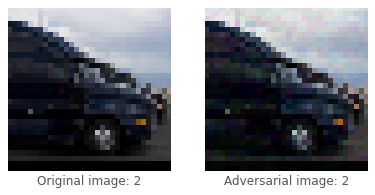

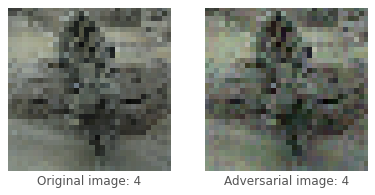

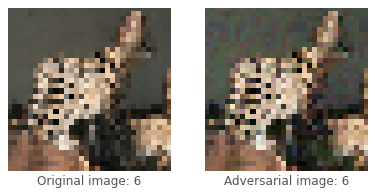

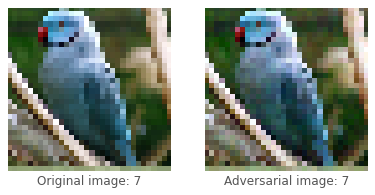

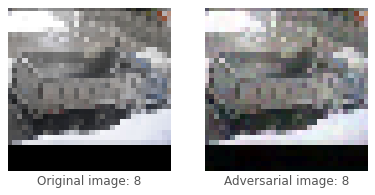

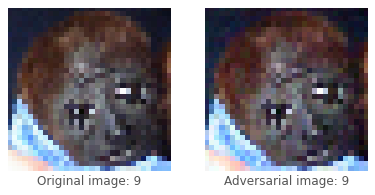

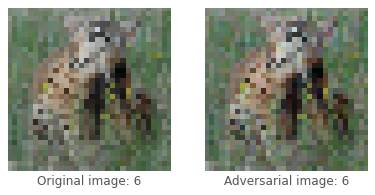

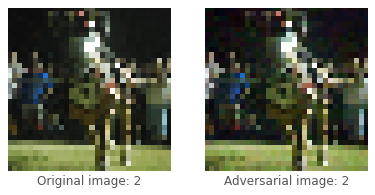

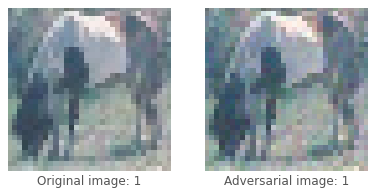

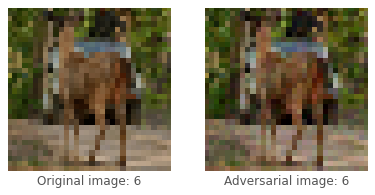

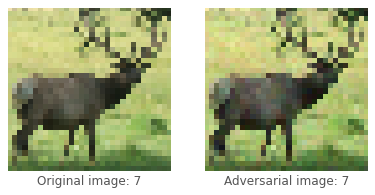

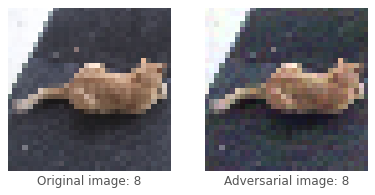

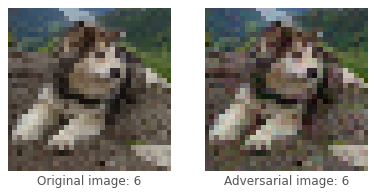

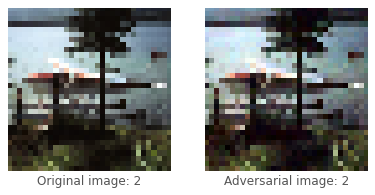

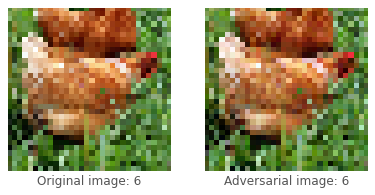

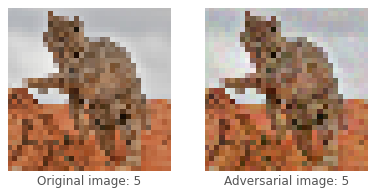

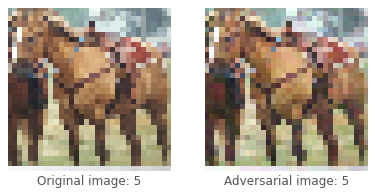

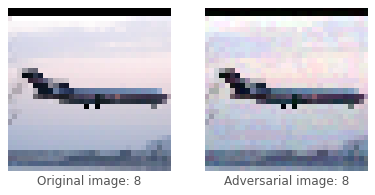

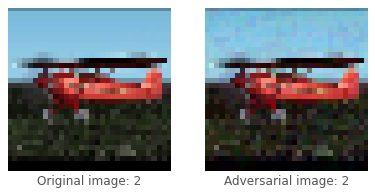

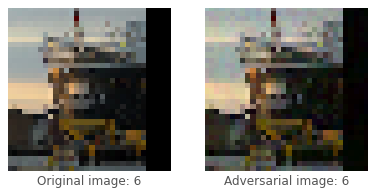

In [47]:
plot_image_grid(20,test_images_attack, image_pgd_adv.numpy(), label_pgd_adv, (32, 32, 3))

#### Mim attack

In [39]:
image_mim_adv = mim_attack(augment_model.model, test_images_attack, test_labels_attack, epsilon=0.0313 , num_steps = 20, step_size = 0.002)
label_mim_adv = np.argmax(augment_model.model(image_mim_adv).numpy(), 1)

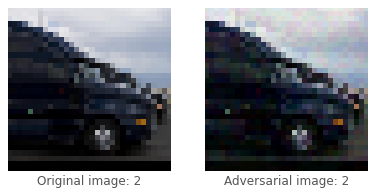

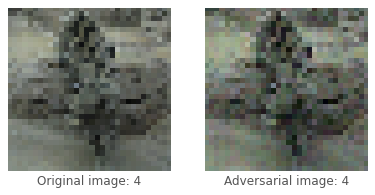

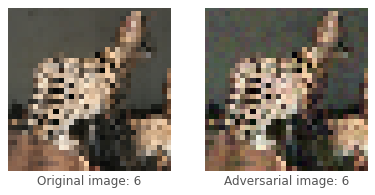

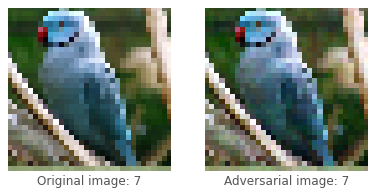

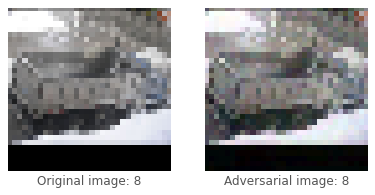

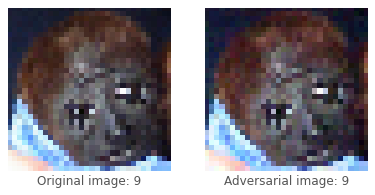

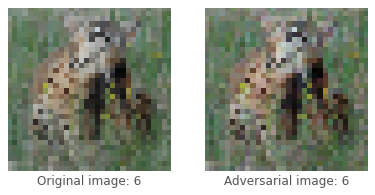

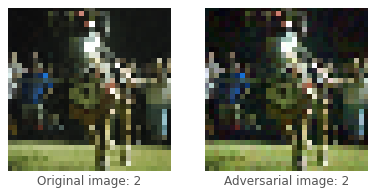

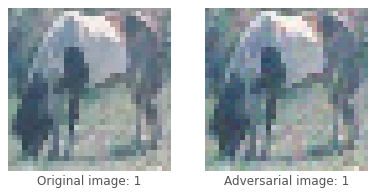

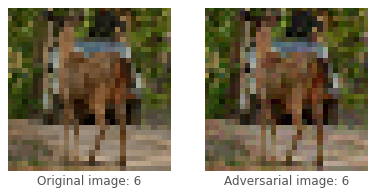

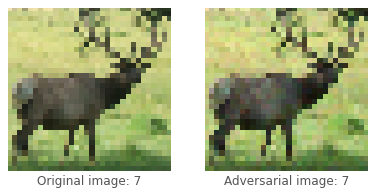

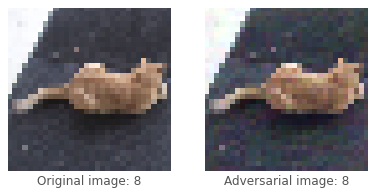

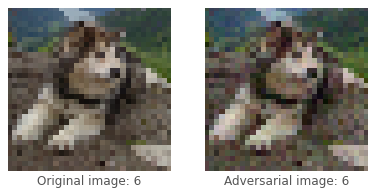

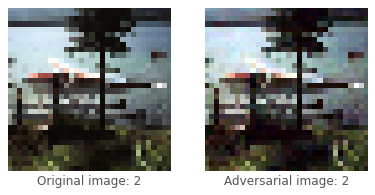

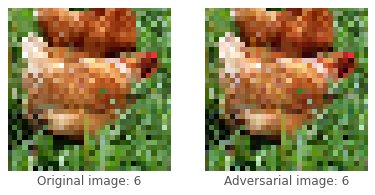

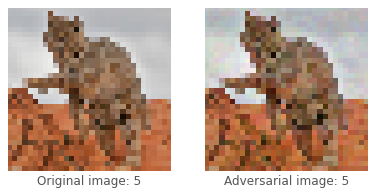

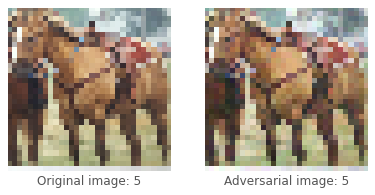

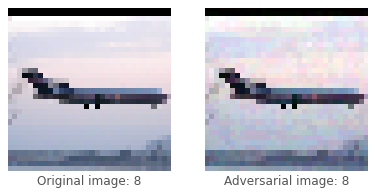

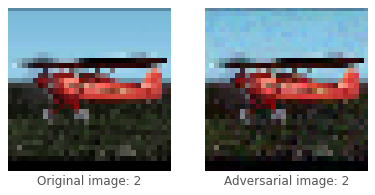

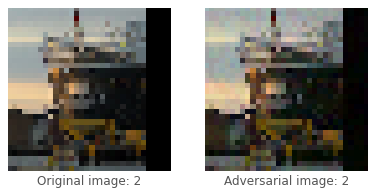

In [48]:
plot_image_grid(20,test_images_attack, image_mim_adv.numpy(), label_mim_adv, (32, 32, 3))

#### Fgsm Attack

In [40]:
image_fgsm_adv = fgsm_attack(augment_model.model, test_images_attack, test_labels_attack, epsilon=0.0313)
label_fgsm_adv = np.argmax(augment_model.model(image_fgsm_adv).numpy(), 1)

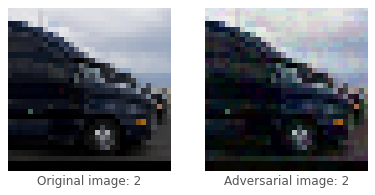

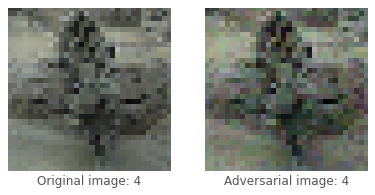

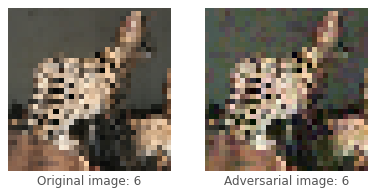

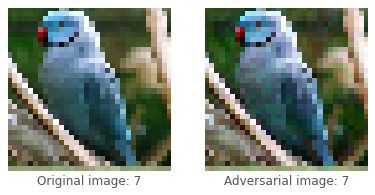

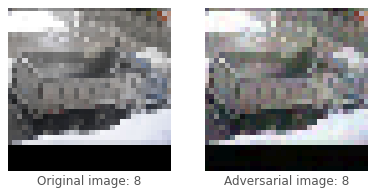

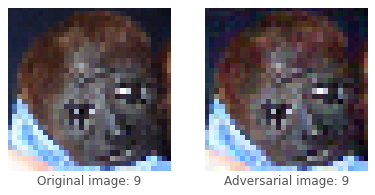

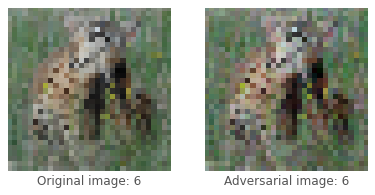

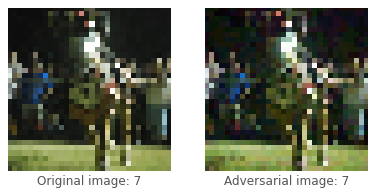

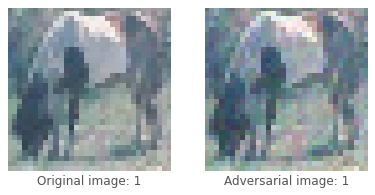

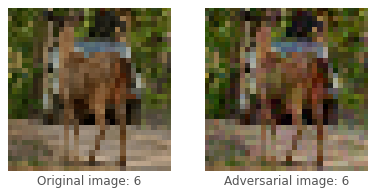

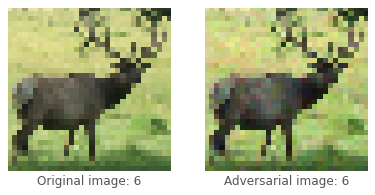

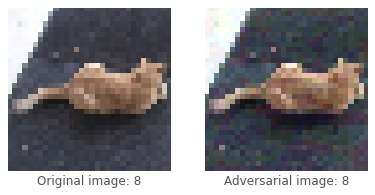

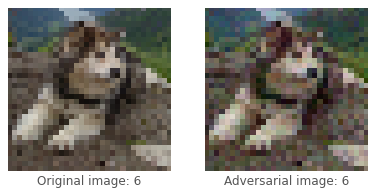

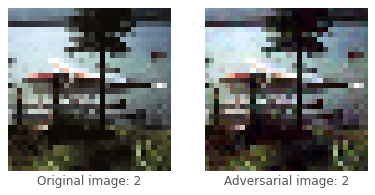

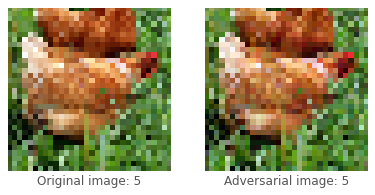

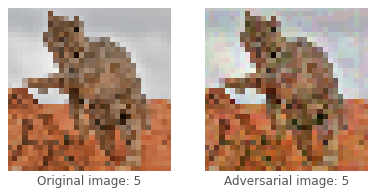

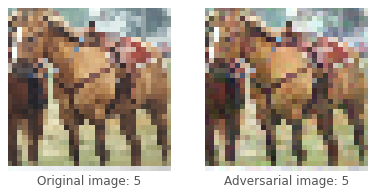

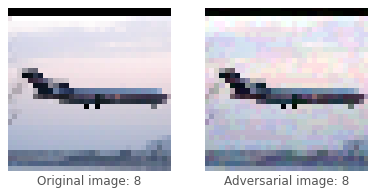

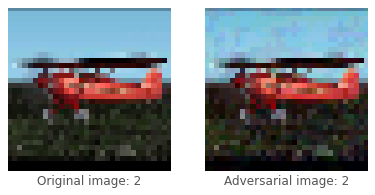

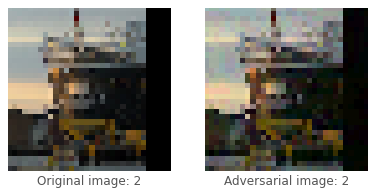

In [49]:
plot_image_grid(20,test_images_attack, image_fgsm_adv.numpy(), label_fgsm_adv, (32, 32, 3))



### <span style="color:#0b486b">Question 3.9: Train a robust model</span>

Train a robust model using adversarial training with PGD ${\epsilon= 0.0313, k=10, \eta= 0.002}$. Write the code for the adversarial training and report the robust accuracies. After finishing the training, you need to store your best robust model in the folder `./models` and load the model to evaluate the robust accuracies for PGD, MIM, and FGSM attacks with $\epsilon= 0.0313, k=20, \eta= 0.002$ on the testing set.
   
<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

#### Dataset

In [54]:
# testing data set
ds_train = data_manager.ds_train
        
train_labels_attack =[]
train_images_attack = []
for image, label in data_manager.ds_train:
    train_labels_attack.append(label.numpy())  # Assuming labels are stored as numpy arrays
    train_images_attack.append(image.numpy())

#print(len(labels),len(images))
#print(type(labels),type(images))

# convert them to numpy array
train_images_attack = np.array(train_images_attack)
train_labels_attack = np.array(train_labels_attack)

In [90]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
# You can add more cells if necessary

# declare the best model, model with augmented data

defence_model = AugmentModel(name='network5',
                     feature_maps=32,
                     num_classes=data_manager.n_classes,
                     num_blocks=4,
                     drop_rate=0.0, 
                     batch_norm=True, 
                    is_augmentation= True,
                     use_skip=False,
                     optimizer='sgd',
                     learning_rate=0.0001)

defence_model.build_cnn()

In [92]:
optimizer = tf.optimizers.Adam(learning_rate=0.001)
loss_obj = tf.nn.sparse_softmax_cross_entropy_with_logits

# metrics to track the different accuracies.
train_loss = tf.metrics.Mean(name='train_loss')
test_acc_clean = tf.metrics.SparseCategoricalAccuracy()
test_acc_pgd = tf.metrics.SparseCategoricalAccuracy()

In [93]:
def train_step_adv(x, x_adv, y):
    with tf.GradientTape() as tape:
        logits = defence_model.model(x)
        logits_adv = defence_model.model(x_adv)
        loss = (loss_obj(y, logits) + loss_obj(y, logits_adv))/2
        gradients = tape.gradient(loss, defence_model.model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, defence_model.model.trainable_variables))
    return loss

### Adversarial Training

In [94]:
epochs = 5 # number of epochs

attack_dataset_train = tf.data.Dataset.from_tensor_slices((train_images_attack, train_labels_attack))
attack_batch_train = defence_model.optimize_data_pipeline(attack_dataset_train, batch_size=32)

for epoch in range(epochs):
    # keras like display of progress
    
    for x, y in attack_batch_train:
       # replace clean example with adversarial example by 10-steps projected_gradient_descent for adversarial training
        x_adv = pgd_attack(defence_model.model, x, y, epsilon=0.0313, num_steps=20,  step_size= 0.002)
        loss = train_step_adv(x, x_adv, y)
        y_pred = defence_model.model(x)
        test_acc_clean(y, y_pred)
        train_loss(loss)
        
    print("Epoch: "+str(epoch)+" Accuracy: "+str(test_acc_clean.result()*100)+" Loss: "+str(train_loss.result()))
        
        

Epoch: 0 Accuracy: tf.Tensor(17.555555, shape=(), dtype=float32) Loss: tf.Tensor(2.2778294, shape=(), dtype=float32)
Epoch: 1 Accuracy: tf.Tensor(20.222223, shape=(), dtype=float32) Loss: tf.Tensor(2.2574487, shape=(), dtype=float32)
Epoch: 2 Accuracy: tf.Tensor(22.162964, shape=(), dtype=float32) Loss: tf.Tensor(2.2430413, shape=(), dtype=float32)
Epoch: 3 Accuracy: tf.Tensor(23.872223, shape=(), dtype=float32) Loss: tf.Tensor(2.2323947, shape=(), dtype=float32)
Epoch: 4 Accuracy: tf.Tensor(24.622223, shape=(), dtype=float32) Loss: tf.Tensor(2.228798, shape=(), dtype=float32)


After training the robust accuracies for adversarial training on PGD attack: 
- first epoch: accuracy = 17.56  loss = 2.28
- second epoch: accuracy = 20.22  loss = 2.26
- third epoch: accuracy = 22.16  loss = 2.24
- forth epoch: accuracy = 23.87  loss = 2.23
- fifth epoch: accuracy = 24.62  loss = 2.23

In [104]:
defence_model.model.save("models")

INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets


In [110]:
defence_model = keras.models.load_model('models')


#### PGD Attack

In [111]:
attack_dataset_train = tf.data.Dataset.from_tensor_slices((train_images_attack, train_labels_attack))
#attack_batch_train = defence_model.optimize_data_pipeline(attack_dataset_train, batch_size=32)

y_adv_pgd = []
y_true_pgd = []
for X_batch, y_batch in attack_batch_train:
    X_batch_adv =x_adv = pgd_attack(defence_model, X_batch, y_batch, epsilon=0.0313, num_steps=20,  step_size= 0.002)
    y_batch_adv = np.argmax(defence_model(X_batch_adv).numpy(), 1)
    y_adv_pgd.append(y_batch_adv[0].tolist())
    y_true_pgd.append(y_batch.numpy()[0].tolist())

In [112]:
test_adv_acc_pgd = accuracy_score(y_true_pgd, y_adv_pgd)
print("Test adv accuracy:{}".format(test_adv_acc_pgd))

Test adv accuracy:0.2127659574468085


#### MIM Attack

In [114]:
attack_dataset_train = tf.data.Dataset.from_tensor_slices((train_images_attack, train_labels_attack))

y_adv_mim = []
y_true_mim = []
for X_batch, y_batch in attack_batch_train:
    X_batch_adv =x_adv = mim_attack(defence_model, X_batch, y_batch, epsilon=0.0313, num_steps=20,  step_size= 0.002)
    y_batch_adv = np.argmax(defence_model(X_batch_adv).numpy(), 1)
    y_adv_mim.append(y_batch_adv[0].tolist())
    y_true_mim.append(y_batch.numpy()[0].tolist())

In [115]:
test_adv_acc_mim = accuracy_score(y_true_pgd, y_adv_mim)
print("Test adv accuracy:{}".format(test_adv_acc_mim))

Test adv accuracy:0.2127659574468085


#### Fgsm Attack

In [116]:
attack_dataset_train = tf.data.Dataset.from_tensor_slices((train_images_attack, train_labels_attack))

y_adv_fgsm = []
y_true_fgsm = []
for X_batch, y_batch in attack_batch_train:
    X_batch_adv =x_adv = fgsm_attack(defence_model, X_batch, y_batch, epsilon=0.0313)
    y_batch_adv = np.argmax(defence_model(X_batch_adv).numpy(), 1)
    y_adv_fgsm.append(y_batch_adv[0].tolist())
    y_true_fgsm.append(y_batch.numpy()[0].tolist())

In [119]:
test_adv_acc_fgsm = accuracy_score(y_true_pgd, y_adv_fgsm)
print("Test adv accuracy:{}".format(test_adv_acc_fgsm))

Test adv accuracy:0.19858156028368795


The following is an exploring question with bonus points. It is great if you try to do this question, but it is **totally optional**. In this question, we will investigate a recent SOTA technique to improve the generalization ability of deep nets named *Sharpness-Aware Minimization (SAM)* ([link to the main paper](https://openreview.net/pdf?id=6Tm1mposlrM)).  Furthermore, SAM is simple and efficient technique, but roughly doubles the training time due to its required computation. If you have an idea to improve SAM, it would be a great paper to top-tier venues in machine learning and computer vision. Highly recommend to give it a try. 

### <span style="color:#0b486b">Question 3.10</span> (bonus question)

Read the SAM paper ([link to the main paper](https://openreview.net/pdf?id=6Tm1mposlrM)). Try to apply this technique to the best obtained model and report the results. For the purpose of implementing SAM, we can flexibly add more cells and extensions to the `model.py` file.

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
# You can add more cells if necessary


--- 
**<div style="text-align: center"> <span style="color:black">END OF ASSIGNMENT</span> </div>**
**<div style="text-align: center"> <span style="color:black">GOOD LUCK WITH YOUR ASSIGNMENT 1!</span> </div>**